In [1]:
from skimage import data, segmentation

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import cv2

import os
import skimage.io as sio
import tqdm
import datetime
import copy

In [16]:
img = data.astronaut()
w, h = int(img.shape[0]/3), int(img.shape[1]/3)
img = cv2.resize(img, (h, w))

# labels = segmentation.slic(img, compactness=10, n_segments=500, start_label=1)
# labels = segmentation.slic(img, compactness=10, n_segments=500, start_label=1)
print(img.shape)

(170, 170, 3)


In [17]:
from src.segment.watershed import watershed_segmentation

In [22]:
# labels = watershed_segmentation(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))
labels = segmentation.slic(img, compactness=15, n_segments=200, start_label=1)

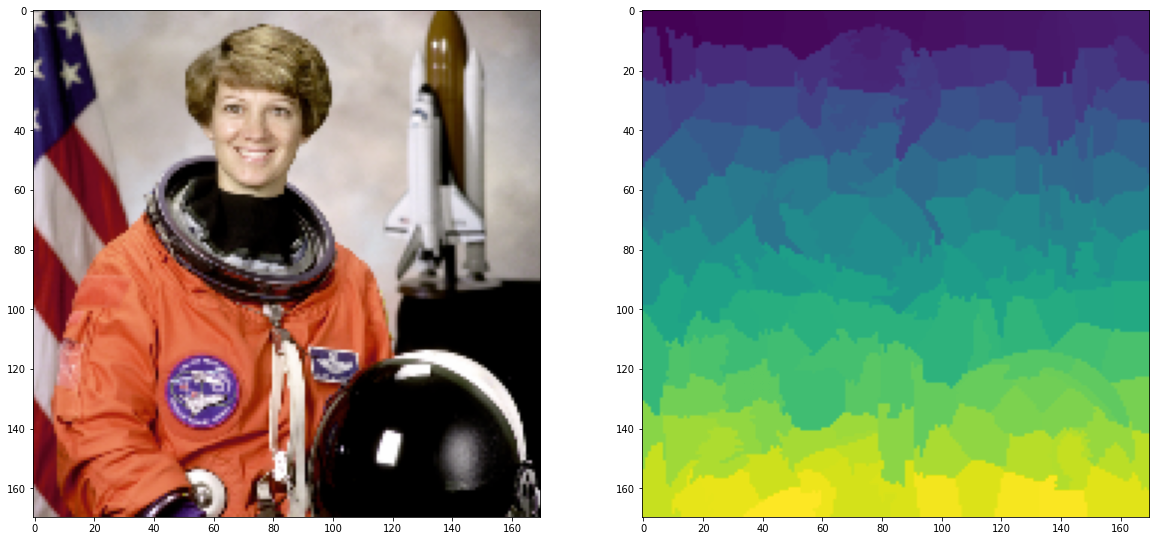

In [23]:
plt.figure(0, figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.imshow(labels)

plt.show()

In [24]:
len(np.unique(labels))

157

In [25]:
from src.rag import RAG
from src.nng import NNG
from src.utils import visualize_rag, quantize_image, visualize_nng

In [26]:
from src.sprt import compute_averageColor, compute_conditionalProbability, compute_averageColor, sample_from_region, sprt_test

In [27]:
from src.region_merging import RegionMerging, NNGRegionMerging

# Start Region Merging

  0%|          | 0/100 [00:00<?, ?it/s]

0:00:00.430284
Number of initial regions:  157


 11%|█         | 11/100 [00:08<01:05,  1.36it/s]


Number of final regions:  38
0:00:08.131816


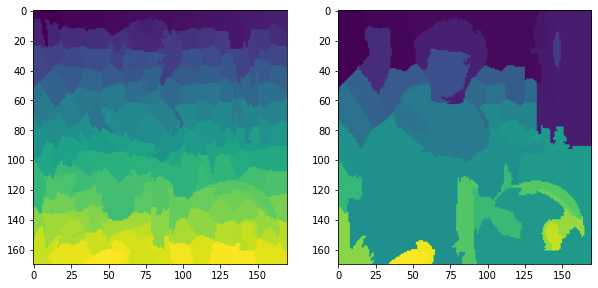

In [28]:
drm = NNGRegionMerging(img, labels, lambda1=0.8, lambda2=0.1)
start = datetime.datetime.now()
initial_labels = drm.get_labels()
initial_graph = copy.deepcopy(drm.graph)
initial_nng_graph = copy.deepcopy(drm.nng)
print("Number of initial regions: ", len(drm.graph.nodes))

drm.run_region_merging(100)

new_labels = drm.get_labels()
print("Number of final regions: ", len(drm.graph.nodes))
print(datetime.datetime.now() - start)


# Visualize
plt.figure(0, figsize=(10, 7))
plt.subplot(1, 2, 1)
plt.imshow(initial_labels)
plt.subplot(1, 2, 2)
plt.imshow(new_labels)
plt.show()

In [29]:
from src.utils import visualize_nng, visualize_rag

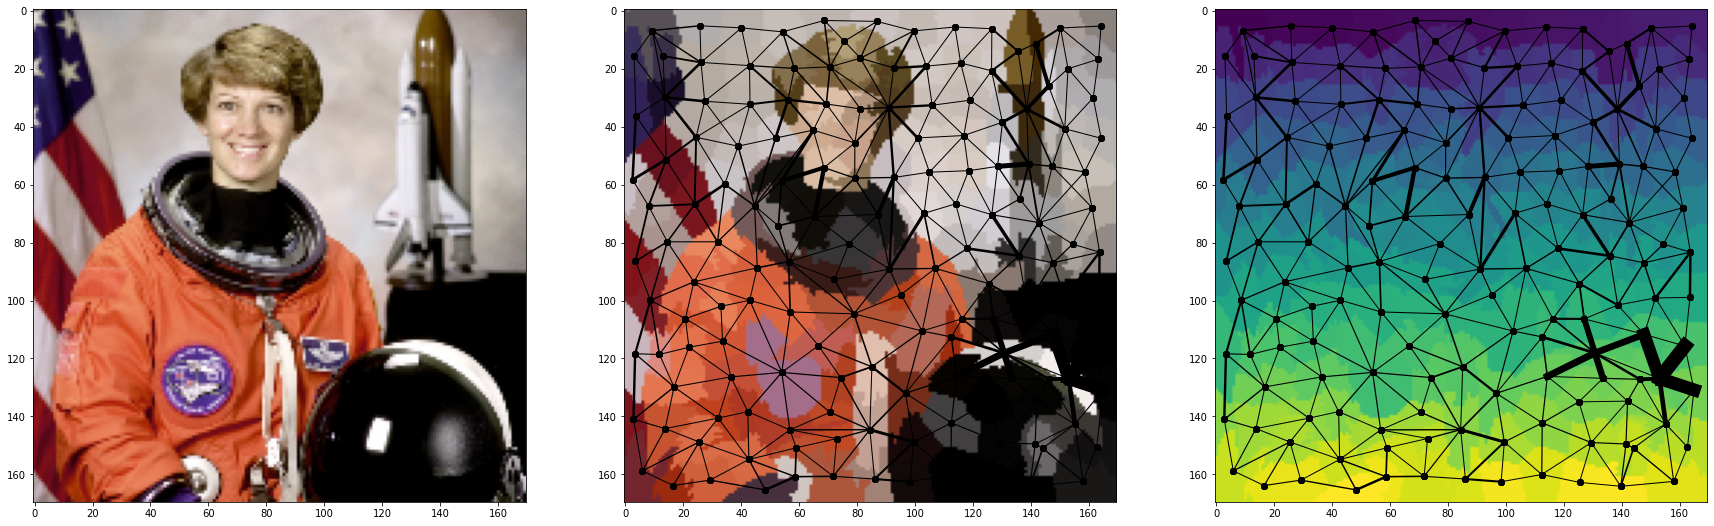

In [30]:
visualize_rag(img, initial_labels, initial_graph)

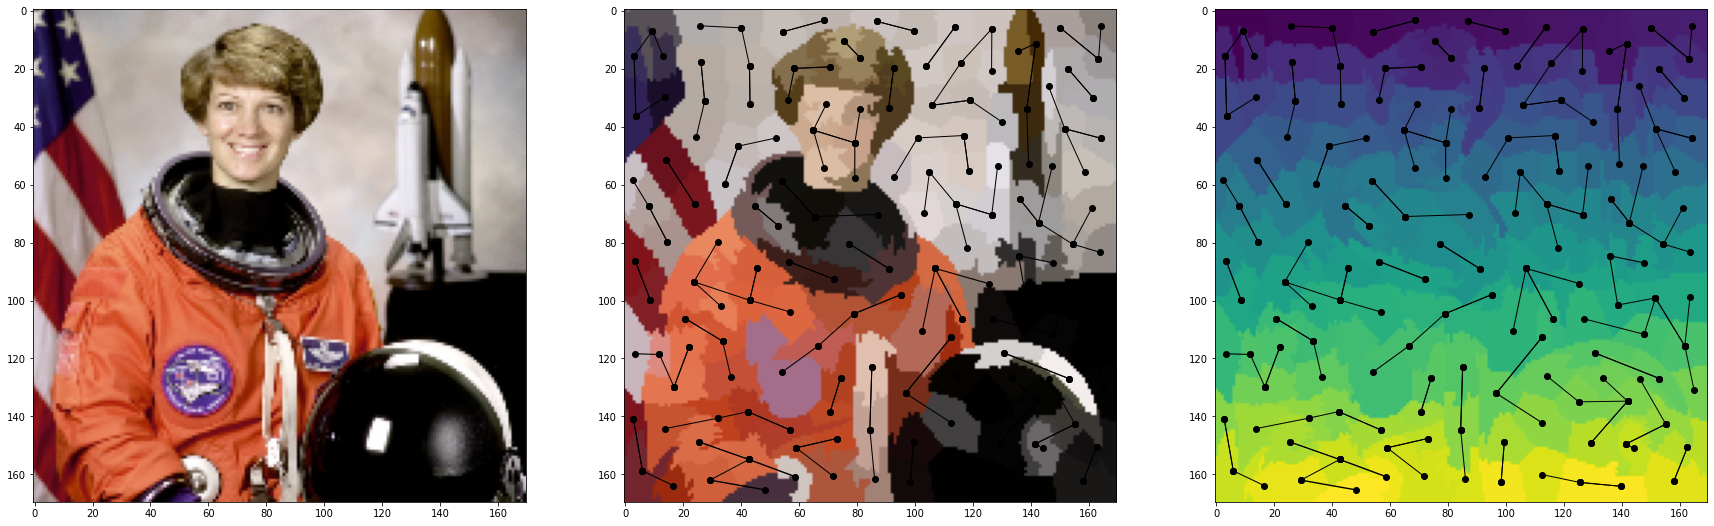

In [31]:
visualize_nng(img, initial_labels, initial_nng_graph)

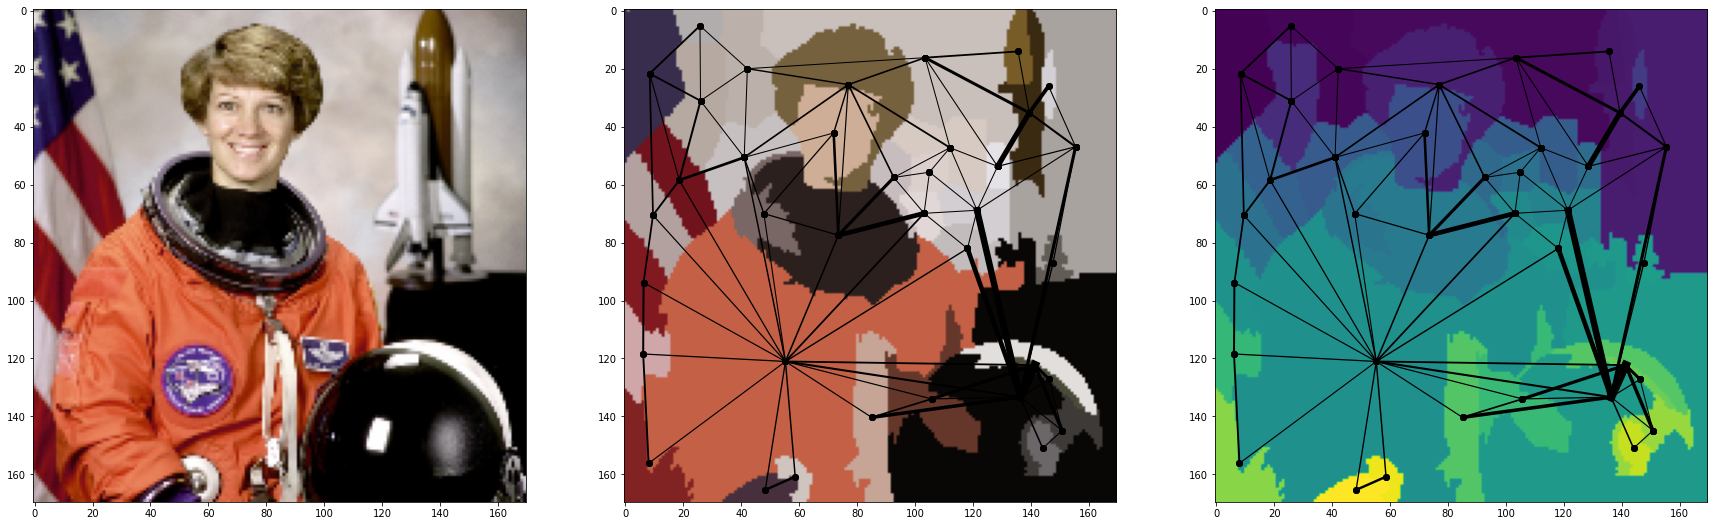

In [32]:
visualize_rag(img, new_labels, drm.graph)

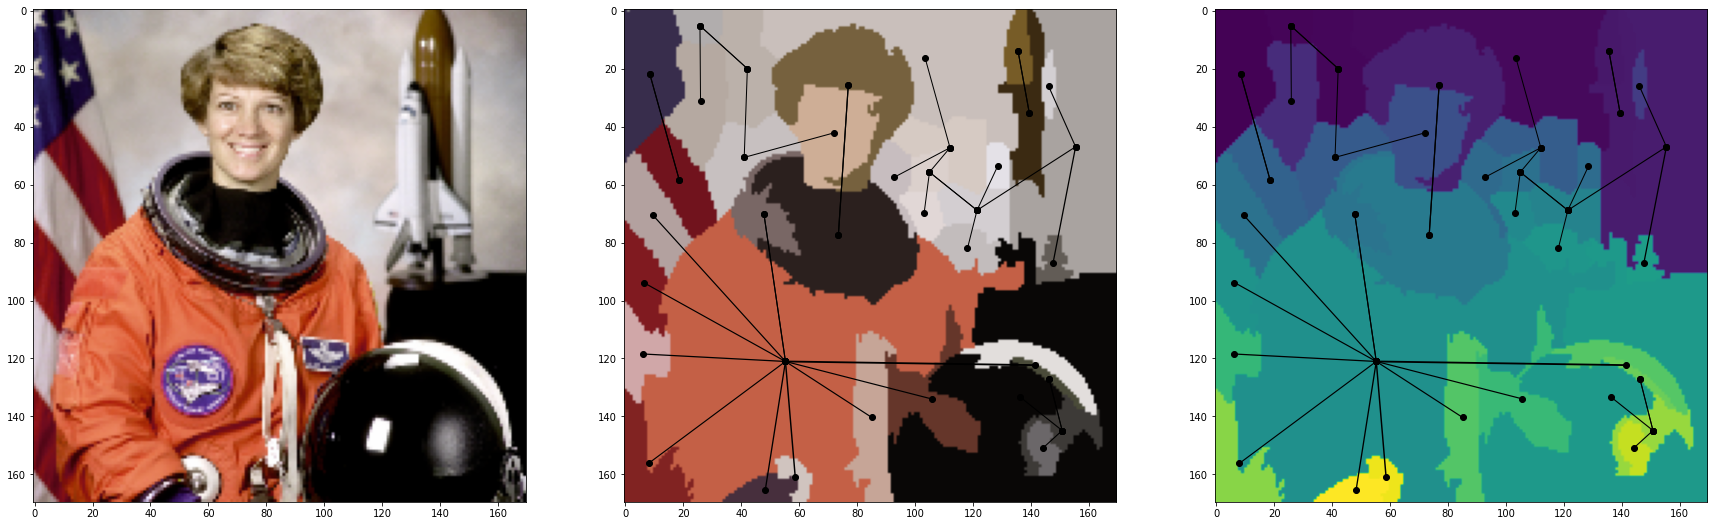

In [33]:
visualize_nng(img, new_labels, drm.nng)